In [1]:
from aip import AipSpeech
from IPython.display import *
import numpy as np
import cv2
import matplotlib.pyplot as plt
import RPi.GPIO as GPIO
import pygame
import time
import os
pygame.mixer.init()
GPIO.setmode(GPIO.BOARD)
GPIO.setup(38,GPIO.OUT)
GPIO.setup(40,GPIO.OUT)
%matplotlib inline
APP_ID = '11011621'
API_KEY = 'GtembSekb8DY90BUIFz450Il'
SECRET_KEY = 'b89f0860e948a3e701f9b098f62cc97f'
client = AipSpeech(APP_ID,API_KEY,SECRET_KEY)
faceCascade = cv2.CascadeClassifier('Cascades/haarcascade_frontalface_default.xml')
def save_audio(name,result): 
    if not os.path.exists('./audio/'+name+'.mp3'):
        fileObject = open('./audio/'+name+'.mp3', 'w')  
        fileObject.write(client.synthesis(result, 'zh', 1, {'vol': 5}))  
        fileObject.close()  
    return './audio/'+name+'.mp3'
def High():
    GPIO.output(38,True)
    GPIO.output(40,False)
def Low():
    GPIO.output(38,False)
    GPIO.output(40,True)
def play(name):
    pygame.mixer.music.load(name)
    pygame.mixer.music.play()
faceCascade = cv2.CascadeClassifier('Cascades/haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture(0)
cap.set(3,320)
cap.set(4,240)    
start_detection = save_audio('s_d','启动人脸识别')
captured = save_audio('cap','捕捉到数据')
play(save_audio('init','初始化完成'))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: This channel is already in use, continuing anyway.  Use GPIO.setwarnings(False) to disable warnings.
  if sys.path[0] == '':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: This channel is already in use, continuing anyway.  Use GPIO.setwarnings(False) to disable warnings.
  del sys.path[0]


In [6]:
time.time()

1522238479.942022

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


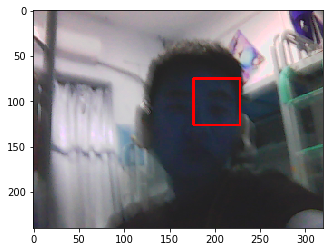

In [2]:
play(start_detection)
while True:
    ret, img = cap.read()
    img = cv2.flip(img, -1)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(
        gray,    
        scaleFactor=1.2,
        minNeighbors=5,    
        minSize=(20, 20)
    )
    if not faces == ():
        play(captured)
        for (x,y,w,h) in faces:
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w] 
        High()
        plt.imshow(img)
        break
    else:
        Low()
cap.release()